# [LAB 04] PCA | Base Model

## #01 PCA 개요

### [1] 차원 축소
- 데이터의 전반적인 특성을 보존하면서 변수의 수를 줄이는 방법
- 크기가 10행 7열인 datagrame 의 차원은 10x7
- 변수 3개를 제거하면 10행 4열로 바뀜


#### (1) 탐색적 데이터 분석 단계에서 분석가가 수행하는 일반적인 차원 축소

|방법|설명|
|-|-|
|특성 선택|가장 중요한 특성들만 선택하여 기존의 데이터를 표현, 즉 일부 변수를 버리는 것을 의미|
|특성 추출|기존 특성들을 사용하여 새로운 특성을 만들어내는 방법, 즉 파생변수를 생성하는 것을 의미|



#### (2) 비지도 학습을 적용한 차원축소--> 주성분 분석(PCA)
- 데이터의 가장 큰 분산을 가진 방향으로 차원을 축소해서 데이터를 표현함
- 이를 통해 데이터를 가장 잘 설명하는 주요 특성을 찾을 수 있음
- 데이터의 복잡성을 줄여주어 다양한 분야에서 활용, 머신러닝, 패턴 인식, 시각화, 데이터 압축 등에서 사용
- 기존의 변수를 조합하여 새로운 변수 생성

* PCA 관점에서 데이터가 많이 퍼져있다 (분산이 크다) = 데이터를 잘 보여준다 , 즉 정보가 많다 + 중요한 방향이다 라고 해석
* 뭔가 축소해야하는 거면 점들이 가장 구분이 잘 되는 방향, 즉 분산이 가장 큰 방향으로 줄이자

## #02 준비작업

### [1] 패키지 가져오기

In [4]:
from hossam import load_data,my_dpi
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler

#주성분 분석 패키지
from sklearn.decomposition import PCA

### [2] 데이터 가져오기

In [5]:
origin=load_data('wine_qt')
origin.head()

이 데이터셋은 와인의 화학적·물리적 특성을 나타내는 연속형 변수들과, 이를 종합해 평가한 품질 점수(quality)로 구성되어 있습니다. (출처: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset)

변수                  설명
--------------------  ----------------
fixed acidity         고정 산도
volatile acidity      휘발성 산도
citric acid           구연산
residual sugar        잔당
chlorides             염화물
free sulfur dioxide   유리 아황산
total sulfur dioxide  총 아황산
density               밀도
pH                    산성도
sulphates             황산염
alcohol               알코올 도수
quality               품질 점수 (0~10)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### [3] 데이터 전처리

#### (1) 종속 변수 제거
차원 축소는 독립변수에 대해서만 적용되는 기법이다

In [6]:
df1 = origin.drop('quality',axis=1)
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


#### (2) 데이터 스케일링
주성분 분석에서는 데이터 스케일링이 필수 과정이다



In [7]:
scaler = StandardScaler()
sdf = DataFrame(scaler.fit_transform(df1),columns=df1.columns)
sdf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382


## #03. 차원 축소
sklearn 의 PCA 분석은 기존의 변수들을 토대로 n_component 수 만큼의 새로운 변수를 생성한다
일반적으로 머신러닝의 학습 데이터를 생성하는 용도

### [1] 차원 축소 수행

| 하이퍼파라미터 | 설명 | 기본값 | 추천 사항 |
|---------------|------|--------|-----------|
| `n_components` | 주성분의 수를 결정한다. (숫자, `None`, `'mle'`) 0~1 사이인 경우 분산의 양이 `n_components`에 지정된 부분분보다 되도록 구성 요소를 선택 | `None` | 데이터의 분산 보존 및 계산 효율성을 고려하여 적절한 값 설정 |
| `svd_solver` | 특이값 분해 방법을 결정한다. | `'auto'` | `'auto'`(권장), `'full'`, `'arpack'`, `'randomized'` 중 하나 선택 |
| `random_state` | 재현 가능한 결과를 얻기 위한 난수 초기값을 결정한다. | `None` | 테스트 시에는 설정하여 일관된 결과를 얻을 수 있도록 함 |


In [8]:
estimator=PCA(n_components='mle' ,random_state=52)
pca = estimator.fit_transform(sdf)
pca

array([[-1.56154478,  0.44489171, -1.76720916, ...,  0.33008582,
        -0.01154807, -0.24961113],
       [-0.76089236,  1.91505819, -0.8641578 , ..., -0.74693875,
         0.54764364,  0.00519571],
       [-0.70808539,  0.91442316, -1.14236292, ..., -0.57565201,
         0.08411791, -0.20371481],
       ...,
       [-2.12463519,  0.87380431,  0.62657264, ...,  0.35760108,
         1.00809106,  0.29669087],
       [-2.20853569,  0.92834262,  1.815403  , ...,  0.26946144,
         1.15057722,  0.43650587],
       [-2.24173343,  1.00318928,  0.65088927, ...,  0.49897478,
         0.70794013,  0.74328967]], shape=(1143, 10))

### [2] 차원 축소 결과를 데이터 프레임으로 구성
- 차원 축소의 컬럼 이름은 일반적으로 PC1,PC... 형식으로 지정

In [9]:
n=pca.shape[1]
cols =[f'PC{i+1}' for i in range(n)]


pca_df = DataFrame(pca , columns=cols)
pca_df['target'] = origin['quality']
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,-1.561545,0.444892,-1.767209,0.132635,0.130138,0.906815,0.122336,0.330086,-0.011548,-0.249611,5
1,-0.760892,1.915058,-0.864158,0.536890,0.090935,-0.860406,0.998623,-0.746939,0.547644,0.005196,5
2,-0.708085,0.914423,-1.142363,0.435075,0.024940,-0.356702,0.536162,-0.575652,0.084118,-0.203715,5
3,2.308166,-0.224448,0.256895,-0.830630,-1.639209,0.154720,-0.300410,0.494589,-0.110087,-0.121798,6
4,-1.561545,0.444892,-1.767209,0.132635,0.130138,0.906815,0.122336,0.330086,-0.011548,-0.249611,5
...,...,...,...,...,...,...,...,...,...,...,...
1138,-1.442233,0.332152,1.137812,0.441063,0.232027,0.499123,0.185077,-0.061655,0.867211,0.217315,6
1139,-1.222998,0.921618,0.027234,0.855285,-0.155510,1.130942,0.605893,-0.364230,0.868018,0.581082,6
1140,-2.124635,0.873804,0.626573,0.399466,-0.177268,-0.063081,-0.221032,0.357601,1.008091,0.296691,5
1141,-2.208536,0.928343,1.815403,0.339723,0.189002,0.665644,0.539637,0.269461,1.150577,0.436506,6


## #03 결과 해석
### [1] 주성분별 설명력

| 주성분 | 설명력 | 의미 |
|--------|--------|------|
| PC1 | 0.287 | 전체 정보의 **28.7%** |
| PC2 | 0.171 | 추가 **17.1%** |
| PC3 | 0.143 | 추가 **14.3%** |
| PC4 | 0.110 | 추가 **11.0%** |
| PC5 | 0.087 | 추가 **8.7%** |


In [10]:
estimator.explained_variance_ratio_

array([0.28692345, 0.17075104, 0.14305928, 0.1101368 , 0.08711032,
       0.06048811, 0.05069067, 0.03809625, 0.03131763, 0.01611195])

### [2] 누적 설명력

In [11]:
estimator.explained_variance_ratio_.cumsum()

array([0.28692345, 0.45767448, 0.60073377, 0.71087056, 0.79798089,
       0.85846899, 0.90915967, 0.94725592, 0.97857355, 0.9946855 ])

PC6에서 누적 설명력이 80%를 초과하므로  
**PC1 ~ PC6까지의 변수만으로 회귀분석, 군집분석 등을 수행**해도 된다.

이는  
`PCA(n_components=6, random_state=52)` 의 결과로 생성된 변수를 사용하겠다는 것과 같은 의미이다.

즉,  
`PCA(n_components=6, random_state=52)` 는  
`PCA(n_components="mle", random_state=52)` 의 결과 중에서 **PC6까지 생성한다는 의미**이다.

---

- PCA를 쓰면 변수 하나하나의 해석은 희생됨  
- 대신 데이터 구조를 반영한 안정적인 예측을 얻음  

> **“해석 중심이면 PCA ❌, 성능·구조 중심이면 PCA ⭕”**


### [3] 누적 설명력이 80% 초과되는 지점까지만 주성분 생성
- n_componets 파라미터에 0-1 사이의 값을 넣으면 그 지점까지 누적하는 값만 보여줌

In [12]:
estimator = PCA(n_components=0.8 , random_state=52)
pca = estimator.fit_transform(sdf)

n=pca.shape[1]
cols = [f'PC{i+1}' for i in range(n)]


pca_df = DataFrame(pca , columns=cols)
pca_df['target'] = origin['quality']
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,target
0,-1.561545,0.444892,-1.767209,0.132635,0.130138,0.906815,5
1,-0.760892,1.915058,-0.864158,0.536890,0.090935,-0.860406,5
2,-0.708085,0.914423,-1.142363,0.435075,0.024940,-0.356702,5
3,2.308166,-0.224448,0.256895,-0.830630,-1.639209,0.154720,6
4,-1.561545,0.444892,-1.767209,0.132635,0.130138,0.906815,5
...,...,...,...,...,...,...,...
1138,-1.442233,0.332152,1.137812,0.441063,0.232027,0.499123,6
1139,-1.222998,0.921618,0.027234,0.855285,-0.155510,1.130942,6
1140,-2.124635,0.873804,0.626573,0.399466,-0.177268,-0.063081,5
1141,-2.208536,0.928343,1.815403,0.339723,0.189002,0.665644,6


### [4] 주성분 로딩 벡터
- 각 주성분이 원변수들을 어떤 비율로 섞어서 만들어졌는지를 나타내는 가중치 벡터
- 절댓값이 클수록 영향 큼
- 0.3 보다 크면 의미가 있따고 보는 관행이 있음
- 가장 큰 값들 위주로 해석
- 같은 부호면 함께 증가/감소 , 다른 부호면 상반 관계

In [13]:
estimator.components_

array([[ 0.48533856, -0.22714317,  0.46007532,  0.17450629,  0.22487011,
        -0.04785179,  0.01506861,  0.39968417, -0.43284424,  0.23755529,
        -0.11879903],
       [-0.10232799,  0.28878641, -0.14650773,  0.2522617 ,  0.15313338,
         0.51702178,  0.57739283,  0.21753697, -0.00637351, -0.06228016,
        -0.38163504],
       [-0.12237612, -0.44371805,  0.24684311,  0.09135939, -0.05256247,
         0.42828836,  0.32342387, -0.33423846,  0.05992279,  0.30276801,
         0.47020106],
       [-0.23604559,  0.07728789, -0.06381775, -0.40726337,  0.65266911,
        -0.05080877, -0.0466689 , -0.16401907, -0.00672433,  0.52754686,
        -0.17995347],
       [-0.09737837,  0.25755756, -0.07767357,  0.70114127,  0.27064882,
        -0.14928186, -0.21047961,  0.15154184,  0.28885414,  0.25049523,
         0.34287354],
       [-0.10336891, -0.41609139, -0.08936147, -0.02481684, -0.31893577,
         0.00952849, -0.09487849,  0.4017928 ,  0.50678678,  0.37739484,
        -0.368

### [5] bi plot
- Bip plot 은 PCA 분석에서 찾은 주성분과 원데이터 변수간의 상관 관계를 보여주는 그래프

- 각 PC 축에 가깝게 평행을 이루는 변수가 해당 PC 에 영향을 가장 많이 주는 변수
- 각 빨간선의 길이는 원변수의 분산을 표현, 길이가 길수록 분산이 길다
- 각 빨간선이 가까울수록 서로 상관관계가 있다 (반대로 서로 거리가 멀수록 상관관계가 적다)

- PCA 는 원래 있는 변수들을 적절히 섞어서 새로운 축을 만들겠다, 이때 얼마나 섞는지 비율이 가중치 = 로딩 = COMPONENTS 값 (이 주성분 축이 만들어질 때 각 원본 변수가 얼마나 중요했는지)

- 점, 샘플의 PC 좌표 , 화살표 , 변수의 가중치 방향


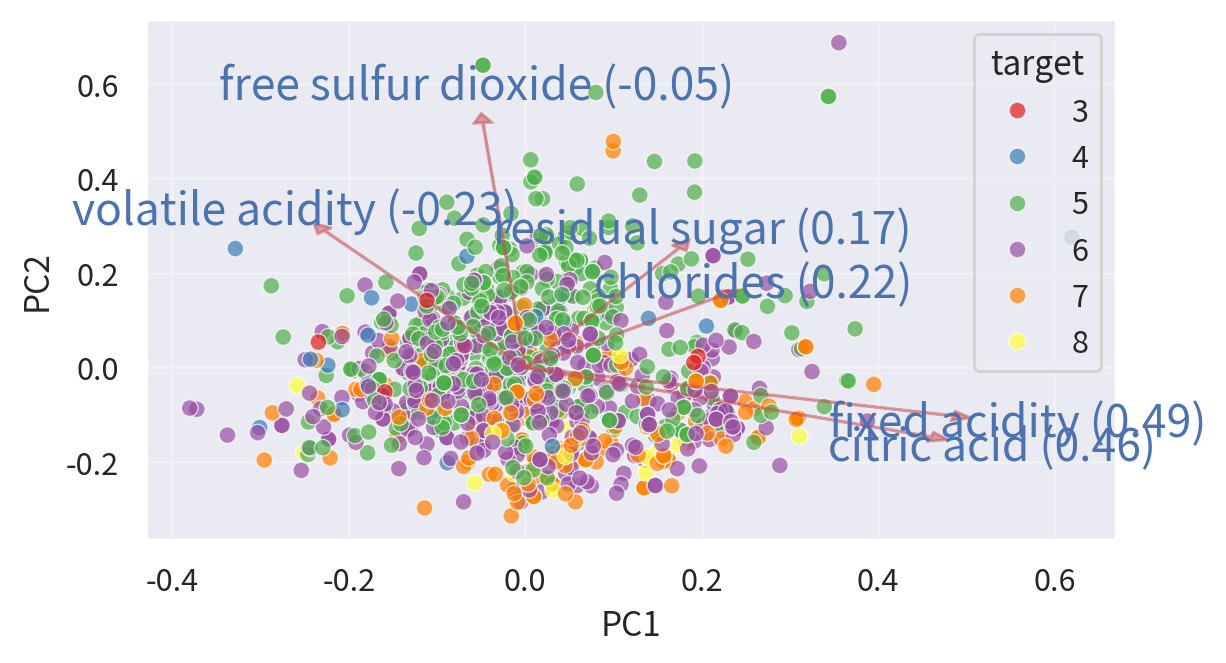

In [14]:

#어떤 두 개의 주성분 축을 볼지 선택
#PCA 가 새로 만든 좌표계 중 가장 중요한 축 2개를 기준으로 시각화 하겠다는 뜻

xname = "PC1"
yname = "PC2"

#PCA 모델 객체 / transform 을 통해서 원본 데이터 sdf 를 PCA 좌표 공간으로 이동
#즉 여기서 SCORE 는 각 샘플의 PCA 좌표 (여기서 새로운 좌표계로 이동한거 , 기저 변환)
score = estimator.transform(sdf)    


#이 줄이 변수의 가중치 (로딩) 각 PC 축이 원래의 변수들을 어떻게 섞어서 만들어졌는지 
#EX) components[0] > PC1 을 만드는 레시피
# 화살표를 그릴때 필요한 재료로, PC 축의 방향 백터 
# PC1 은 즉 원본 변수들의 선형 결합

components = estimator.components_  


#PC1 이 몇번째 컬럼인지 찾는 작업
x_index = pca_df.columns.get_loc(xname)
y_index = pca_df.columns.get_loc(yname)


#모든 샘플의 PC1 좌표 --> XS , 모든 샘플의 PC2 좌표 --> YS
#각 점은 (PC1,PC2) 위치로 찍힘 (새로운 좌표계에 점이 찍힌다는 건가?)
xs = score[:, x_index]
ys = score[:, y_index]
n = score.shape[1]


#점들이 너무 퍼지거나 몰리지 않게, 좌표 범위를 보기 좋게 조정
scalex = 1.0 / (xs.max() - xs.min())
scaley = 1.0 / (ys.max() - ys.min())

# 시각화
figsize = (1280 / my_dpi, 720 / my_dpi)
fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=my_dpi)


#PCA 점 (샘플 찍는 부분)
#각 샘플을 PCA 좌표계에 표시
sb.scatterplot(
    x=xs * scalex, y=ys * scaley, hue=pca_df["target"],
    palette="Set1", ax=ax, alpha=0.7
)


# 모든 변수에 대해 화살표 그리기
# 화살표의 시작점은 (0,0) PCA 공간의 원점

# 끝점은 x = 변수의 PC1 가중치 , y = 변수의 PC2 가중치
# 이 변수는 PC1 방향으로 얼마나, PC2 방향으로 얼마나 기여했는가

for i in range(n):
    ax.arrow(
        0,
        0,
        components[x_index, i],
        components[y_index, i],
        color="r",
        alpha=0.5,
        head_width=0.02,
        head_length=0.02,
    )
    
    #화살표 끝에 변수 이름 표시
    ax.text(
        components[x_index, i] * 1.15,
        components[y_index, i] * 1.15,
        f"{df1.columns[i]} ({components[x_index, i]:.2f})",
        color="b",
        ha="center",
        va="center",
    )

ax.grid(True, alpha=0.3)
# ax.set_xlim(-1, 1)
# ax.set_ylim(-1, 1)



#x 축 = PC1 , y 축은 PC2, 즉 원본 변수 공간이 아니라 PCA 공간
ax.set_xlabel(xname)
ax.set_ylabel(yname)

plt.tight_layout()
plt.show()
plt.close()


<BI PLOT 해석하기>

- 색깔 점들 : 각 와인 샘플의 PCA 좌표 (PC 점수)
- 빨간 화살표 : 각 화학 성분의 로딩 (변수 기여 방향 / 각 원본 변수가 PC1 ,PC2 축에 얼마나)
- X 축은 PC1 , 데이터의 분산을 가장 많이 설명하는 방향, 
- 이 축을 크게 만드는 변수는 
- 👉 fixed acidity (0.49) 👉 citric acid (0.46)
즉 PC1 오른쪽으로 갈수록
➡ 산 성분 많은 와인
- Y 축은 PC2 , 두번째로 중요한 분산 방향, 크게 기여하는 변수:
👉 free sulfur dioxide (0.05) 👉 volatile acidity (-0.23)
- 화살표 해석법 : 길이는 즉 영향력, 길이가 길수록 그 변수가 PC1, PC2 설명에 중요해지는 것 


- 샘플(sample): 데이터 한 행(와인 한 병, 사과 한 개 같은 관측치)
- 원본 변수(original features): 데이터의 열들(fixed acidity, sugar 등)
- PCA 점수(PC score): 샘플을 PCA 좌표계(PC1, PC2, …)에 놓았을 때의 좌표값
→ 그림의 점

- 로딩(loading): 각 원본 변수가 PC축을 만들 때 쓰인 가중치(= PC축의 방향 성분)
→ 그림의 화살표 방향/길이

- 바이플롯(biplot): 점(샘플 점수) + 화살표(변수 로딩)를 같이 그린 플롯
- 그림에서 화살표의 의미 , 이 변수가 PC1, PC2 평면에서 어느 방향으로 작용하는가? , 즉 변수 방향 벡터
- 화살표가 길수록, PC1,PC2 로 설명되는 수준이 큼 ( 이 평면에서 중요한 벡터)
- 방향이 비슷하면, 두 변수는 양의 상관 관계
- 어떤 점이 특정 화살표 방향으로 많이 가 있으면, 그 샘플은 해당 변수 값이 큰 영향을 받는것